### 3.3 Lab Assignment
By: Monica Alicea, Kelton Berry, Andrew Caietti, Asha Silva

# **1. Background**

## 1.1 What are Filters

Much like its use in the rest of the world, in data science, filters refer to the processes used to segment off certain components of data. Applied in data science, filters are often functions or coded commands that remove undesirable data and keeping only wanted data. At a basic level, filters cutoff data found below or above a determined threshold; data that remains is used for future analysis, while the rest is discarded. 


Filters are necessary in almost every field of life, but specifically in time series analysis. Without filters, data scientists would be forced to work with every dataset in its entirety. Often, there are limitations on how much computational power can be put towards processing a large dataset. Even if the dataset can be processed,  data scientists often do not have the time necessary to analyze a large dataset. Most importantly, if filters did not exist, scientists would not be able to answer questions that require these refined datasets. Filters have opened new avenues of analysis to the scientific community.

## 1.2 Examples of Filters
Filters can be used for a variety of applications. One application can be seen in image recovery. Literature has seen linear filtering be applied using the discrete Fourier Transform where an image is able to be cleared of any periodic noise encountered (Eduardo et. al, 2005). Image processing sees the use of filters beyond the linear form, with applications of Gaussian filters, and Averaging filters to remove noise from a given image (Wang, 2016). Beyond applications in image and video processing, filters have seen extensive use in audio processing. This is because filters are able to effectively remove frequencies through various applications of either high/low pass or band-pass/band-stop filters. So, for example, if one identifies in an audio file the high-frequency hum of a light fixture as producing audio at, say 16khz, then a high-pass filter could potentially be utilized to remove this humming from the audio file.  

# **2. Methods**

## 2.1 Data Set
This project uses the song Ave Verum Corpus to investigate how filters can be applied to a frequency domain. Ave Verum Corpus is an audio composition from Mozart that was made in 1791. It is largely composed by a choir with an organ complementing the piece. While there have been many adaptations of this piece since its original composition, our audio file is specifically Colin Mawby's take on the piece from the 21st century. The file itself is in .mp3 format, and is read into an R environment using the tuneR library.

## 2.2 Summary Statistics
 Below are relevant summary statistics from the audio file.

| Number of Samples | Sampling Frequency (hz) | Hertz Range (hz) |
| ------------------ | --------------- | ----------- | 
| 9890880 | 44,100 | 0 - 16,000 |


## 2.3 Read in Data

In [ ]:
install.packages('tuneR')
library('tuneR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘signal’




In [ ]:
install.packages('tswge')
library('tswge')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘PolynomF’, ‘waveslim’, ‘astsa’




In [ ]:
mp3_ave <- "/content/ave.mp3"
my_mp3_ave <- readMP3(mp3_ave)

num_samples_ave <- length(my_mp3_ave@left)
num_samples_ave / my_mp3_ave@samp.rate / 60

ave <- my_mp3_ave@left
m1_ave <- ave / 2^(my_mp3_ave@bit - 1)
my_time_ave <- (0:(num_samples_ave - 1)) / my_mp3_ave@samp.rate

[1] 3.73805

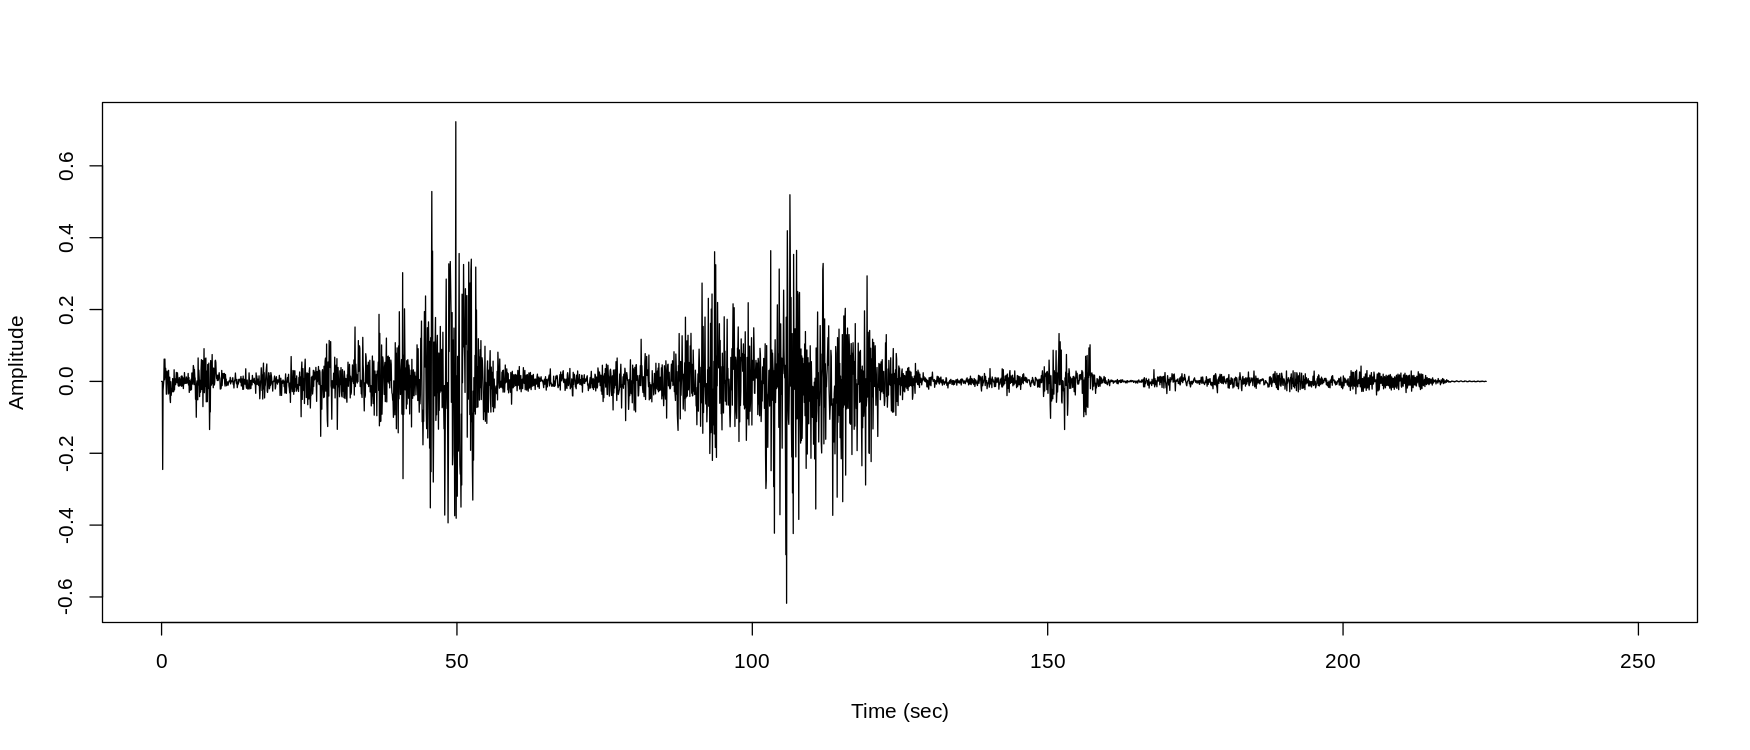

In [ ]:
# Plot of Ave Verum Corpus' Realization
my.indx_ave <- seq(1, (num_samples_ave - 1), 2756)
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(my_time_ave[my.indx_ave], m1_ave[my.indx_ave], type='l', col='black', xlab='Time (sec)', ylab='Amplitude', xlim=c(0,250), main = 'Ave Verum Corpus Realization')

#  **3. Results**

In [ ]:
data <- m1_ave[my.indx_ave] # rename data for analysis

## 3.1 Raw Frequency Analysis

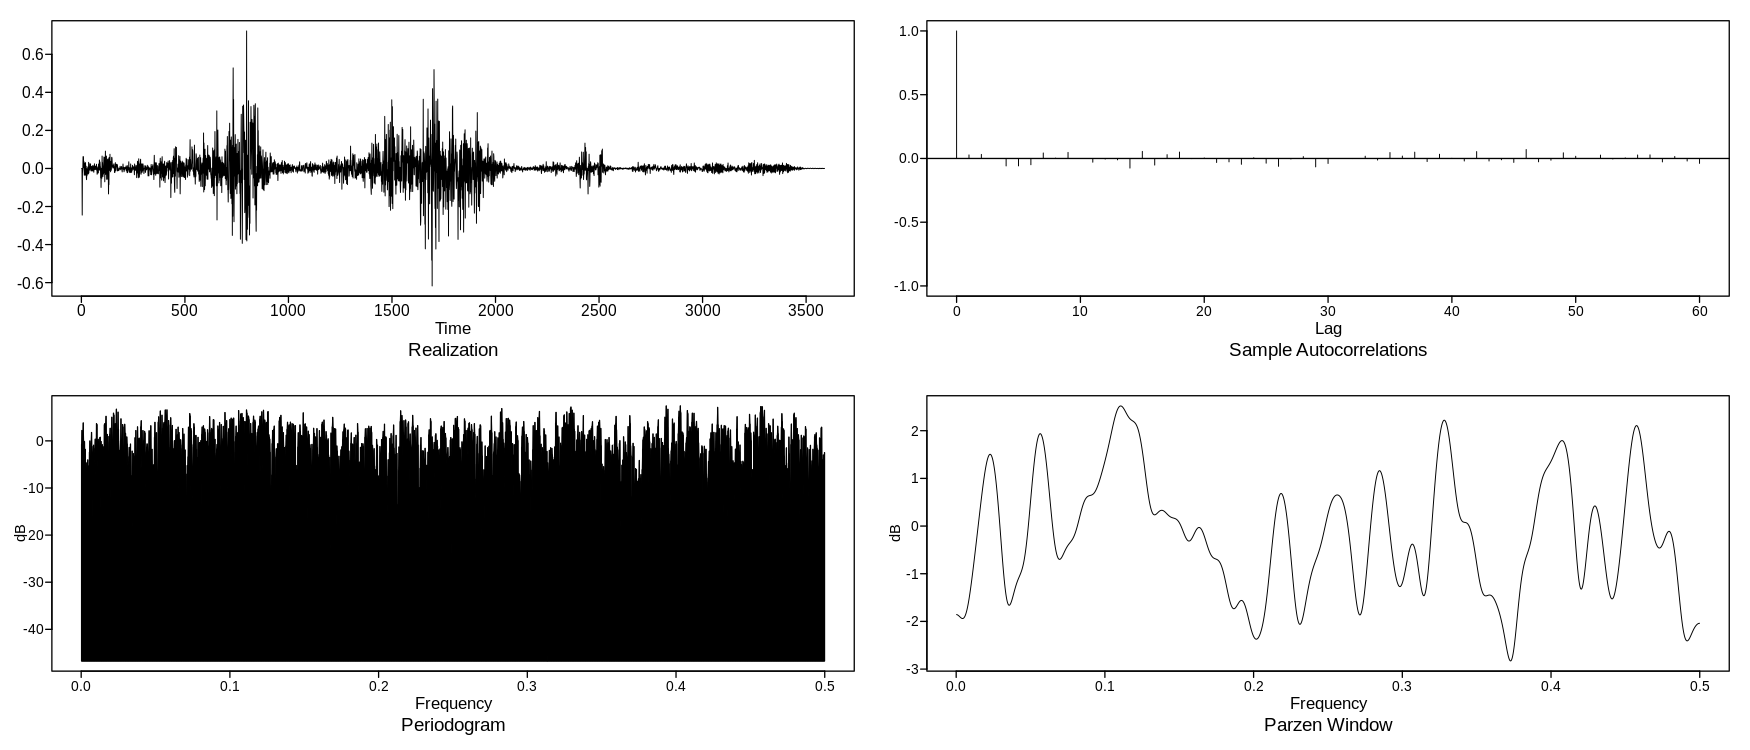

In [ ]:
norm.plots <- plotts.sample.wge(data, lag.max = 60)

## 3.2 Filtered Frequency Analysis

### 3.2.1 High Pass Filter

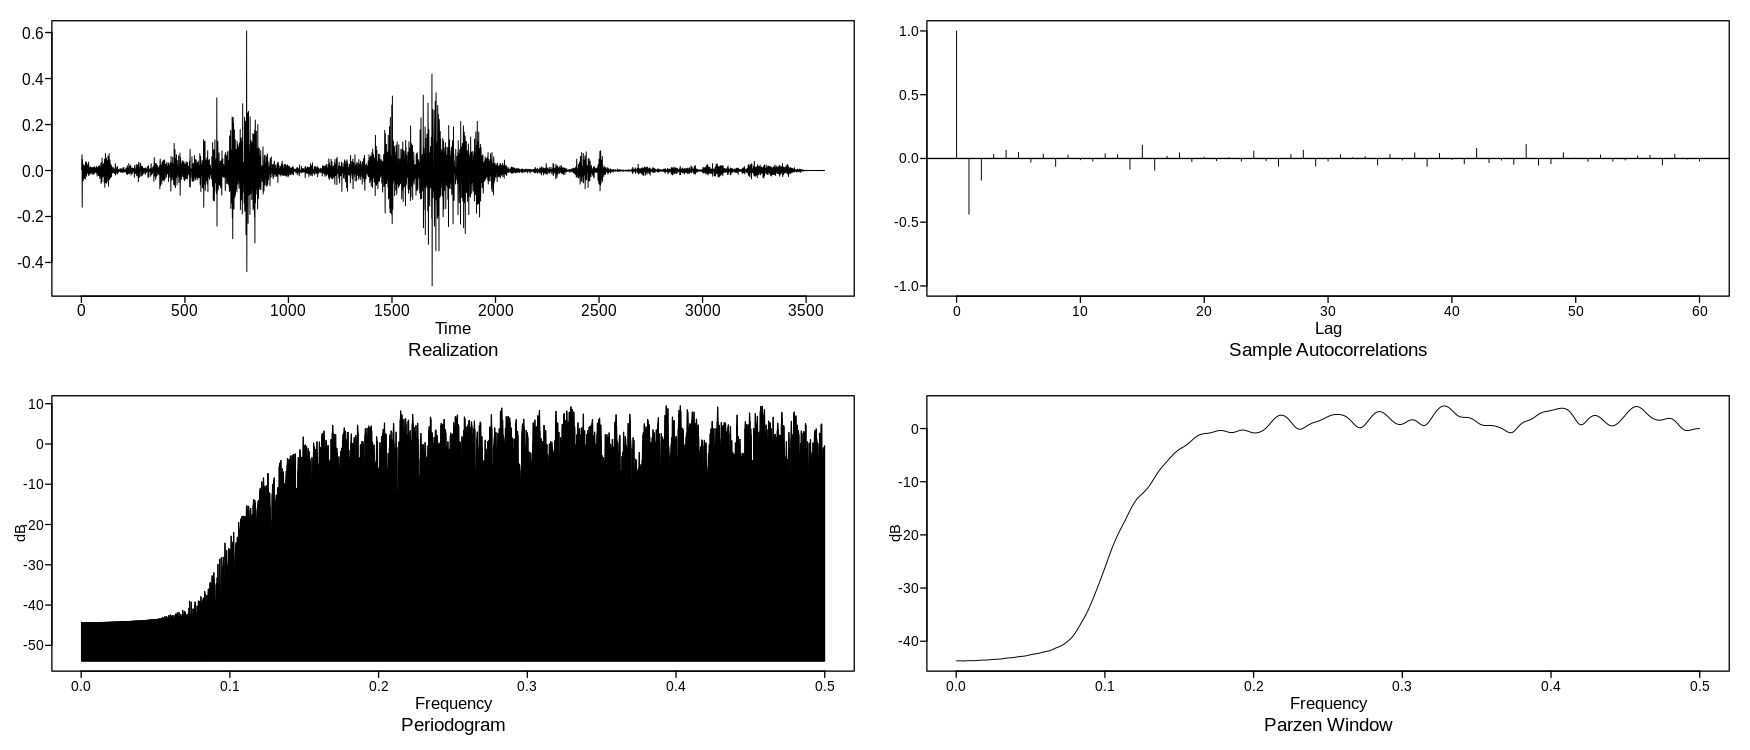

In [ ]:
data.high <- butterworth.wge(data, 4, type = 'high', cutoff = 0.15, plot = FALSE)

high.plots <- plotts.sample.wge(data.high$x.filt, lag.max = 60)

### 3.2.2 Low Pass Filter

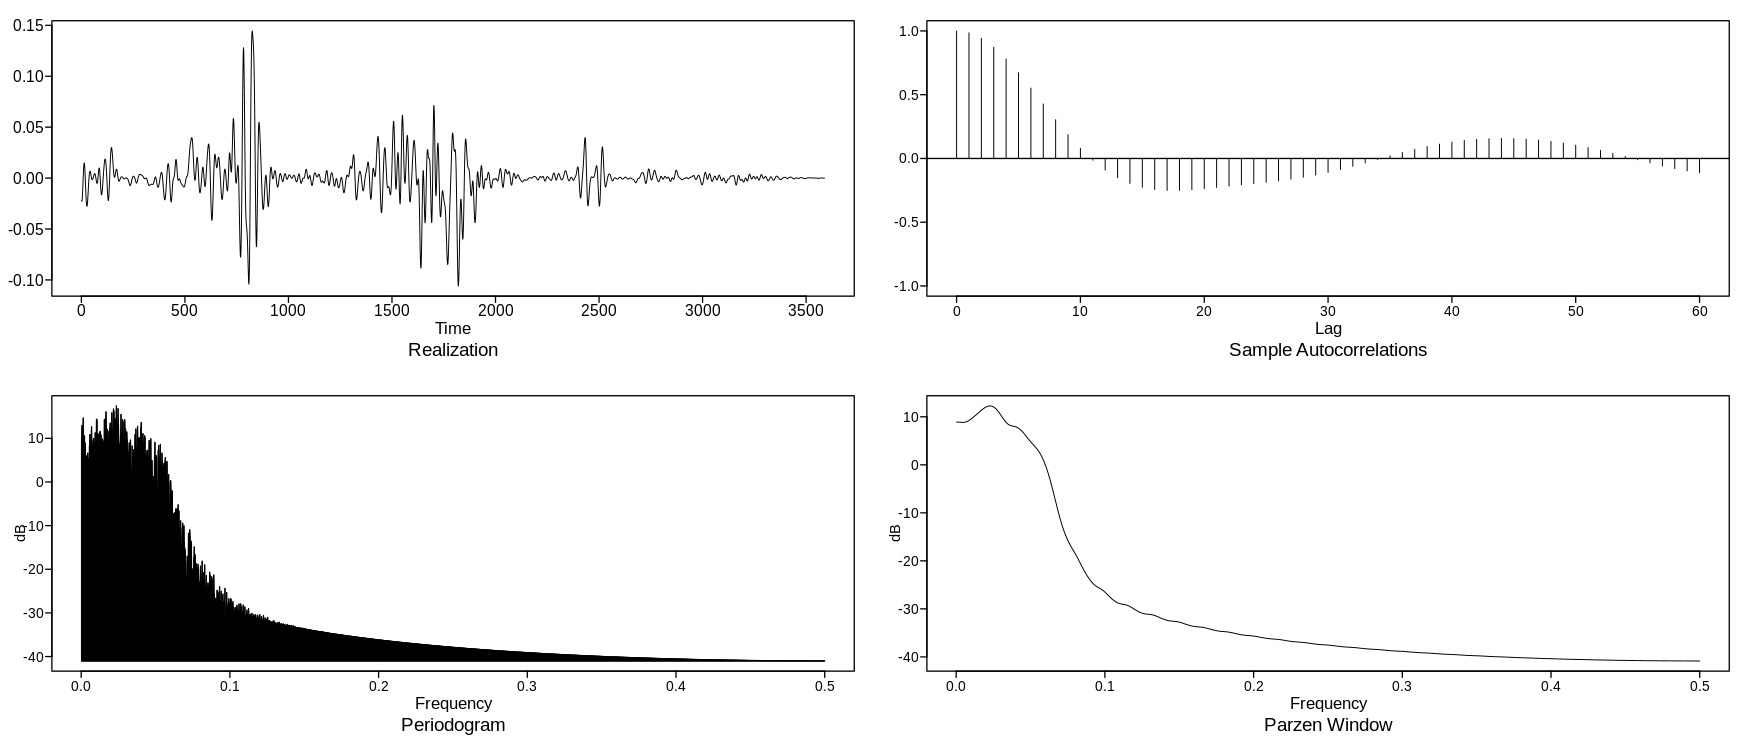

In [ ]:
data.low <- butterworth.wge(data, 4, type = 'low', cutoff = 0.05, plot = FALSE)

low.plots <- plotts.sample.wge(data.low$x.filt, lag.max = 60)

# **4. Discussion**

## Raw Data
The realization highlights the two main 'choruses' in Ave Verum Corpus. In the first chorus, at about x = 700 in the realization, we can see three consecutive high frequency peaks. The unfiltered dataset has two main components of composition: the organ and the choir. These three consecutive high frequency peaks translate to the choir singing the same line, 'pro homine,' repeatedly yet with increasing pitch and crescendoing. The organ also matches the inverse of this pattern with decreasing pitch. The second chorus is visible at approximately x = 1600. This is the main chorus of the song. Here, the choir is again increasing in pitch and crescendoing, yet the Organ this time has a much more prominent position with the notably lower frequency complementing the choir's high frequency notes. As an aside, this is the moment of the song where, since it is rooted as a Eucharistic chant, the consecration of the Eucharist occurs. Thus, this is the main release of the song to which the Organ and choir build up to. 

The parzen window reveals a strong periodic trend throughout the data. In particular, a peak at about x = 0.11 frequency, indicates a notably longer periodic trend. Yet, while there are three notable peaks before x = 0.2, the majority of peaks are at x > 0.2. This indicates that, since there are larger dominant frequencies, there are many different periodic trends in the data that are much shorter relative to the three longer periodic trends indicated by the lower frequencies of the parzen window.

When attempting to decipher the autocorrelations plot, it is difficult to determine any sort of periodic behavior being represented across the lags. This is because there are so many competing periodic trends that it convolutes the autocorrelations plot. 

Intuitively, it makes sense that this piece would have notable longer periodic trends and many more shorter periodic trends. This is because the song is composed of two main audio signatures: the organ and the choir. The organ, playing much slower and longer notes, is likely what is accounting for the much longer periodic trends. The choir on the other hand, playing much higher-pitch notes that change much faster than the organ, is likely what is accounting for the more rapid periodic trends. That is not to say that only the Organ and choir account for periodicity in our data. At the end of the day, both segments work together to form the song itself. So, since there are two main peaks at about x = 700 and about  = 1600 in the realization, it is expected that one of the smaller dominant frequencies, representing a much longer periodic trend, represents these two spikes in the realization. 

## High Pass Filter

The High Pass filter removes the low frequency audio from the data. This translates to removing the sound signature of the organ from the file. Thus, what remains is largely just the choir, as the choir in the piece is singing at much higher fequencies than the organ is playing at. The High Pass filter is extremely visible in the periodigram, where there is a significant removal of audio for values from 0 < x = frequency < 0.1. Since an order of 4 has been specified, the slope of the curve in the periodigram is not quite as steep as a higher order Butterworth High Pass would produce, but steep nonetheless. 

The realization of the filtered data tells us that much of the density of our data is not lost by removing the low frequency sound. Thus, the choir's sound signature must be accounting for notably more of the data relative to the organ.

The parzen window illustrates the choir's periodicity, represented in the data as being rapidly cyclical. This is because many of the peaks in the parzen are at higher frequency values, so the periodic trends at these dominant frequencies are occurring quickly. This could be due to the fact that the choir is the isolated sound, and a given note or series of notes they sing could be repeated between stanzas in the song. Thus, these dominant frequencies are likely repeated patterns of notes in the piece itself. Also, the choir itself would sing many more notes in a given stanza and could be composed of different subsections within the choir, such as tenors and altos. So, different subsections of the choir singing different patterns of notes would represent itself in the parzen window with many different dominant frequencies that are resulting in shorter periodic trends. 

Finally, the autocorrelations plot contains a potential sinusoidal pattern. However, with so many different dominant frequencies competing with eachother, it is hard to notice any one dominant trend unlike below in the case of the Low Pass filter. 



## Low Pass Filter

The Low Pass filter removes the high frequency audio from the file. Thus, in the case of Ave Verum Corpus, the filter removes much of the choral portion of the audio and leaves mainly the organ audio signature. This is beause the organ is producing audio at much lower frequencies, since it functions as a complement to much of the higher frequency singing of the choir. 

When considering the periodogram, the Butterworth Low Pass filter is easily observable. The specified cut off of 0.05 manifests in the beginning of the filter curve at x = 0.05, while the slope of the curve is rather steep since a power of 4 was passed to the function. The realization is also noteworthy in this instance, as much "thinner" or less dense data is observed. This could indicate that the organ has a smaller sound signature relative to the choir. 

The parzen reveals a notable peak at a lower frequency, indicating a periodic trend that is much longer in the dataset. This is counter to what was observed with the choir, which demonstrated shorter or faster periodic trends. Finally, this periodicity occurs in the plot of the autocorrelations, which illustrates a notable sinusoidal trend where one iteration appears to have a length of 47 lags.

Intuitively, it makes sense that the organ's audio signature has a long periodic trend. This is because, when listening to Ave Verum Corpus, the organ plays much longer notes than the choir holds. So, while the organ might play a single note over a stanza or two, the choir may have played anywhere from 5 to 10 times the amount of notes in that same stanza. So, the organ is changing notes much less frequently and thus there is a longer periodic trend for the organ. 

# **References**
* Silva, E. A. B. da, &amp; Mendonça, G. V. (2007, September 2). Digital Image Processing. The Electrical Engineering Handbook. https://www.sciencedirect.com/science/article/pii/B9780121709600500645?via%3Dihub. 
* Wang, Yao. (2016). Tandon School of Engineering, New York University. https://eeweb.engineering.nyu.edu/~yao/EL6123_s16/ImageFiltering_2016.pdf
